# $ZnCl_{2}$ in DI CV Scans

In [2]:
# Import Libraries

import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations and trendlines
from scipy.stats import linregress  # For linear trendlines 
import pandas as pd # For reading excel files
import math

In [22]:
# Read Excel files
Scan100mVs = r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\100 mVs\Zinc-DW 221124 -1v 1.5v 100mvs Cycle2.xlsx"
Scan80mVs = r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\80 mVs\Zinc-DW 221124 -1v 1.5v 80mvs Cycle2.xlsx"
Scan60mVs = r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\60mVs\Zinc-DW 221124 -1v 1.5v 60mvs Cycle2.xlsx"
Scan40mVs = r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\40 mVs\Zinc-DW 221124 -1v 1.5v 40mvs Cycle2.xlsx"
Scan20mVs = r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\20mVs\Zinc-DW 221124 -1v 1.5v 20mvs Cycle2.xlsx"
# Load data from Excel files into DataFrames
df100 = pd.read_excel(Scan100mVs, sheet_name="Sheet3") # Sheet 3 contain the average I values for all cycles, then folded into the Qdens
df80 = pd.read_excel(Scan80mVs, sheet_name="Sheet3")
df60 = pd.read_excel(Scan60mVs, sheet_name="Sheet3")
df40 = pd.read_excel(Scan40mVs, sheet_name="Sheet3")
df20 = pd.read_excel(Scan20mVs, sheet_name="Sheet3")

#print(df20.head())
#print(df40.head())
#print(df60.head())
#print(df80.head())
#print(df100.head())

In [24]:
# Extract the necessary columns
#100 mVs
x1 = df100['E /V']
y1 = df100['Qdens']

#80 mVs
x2 = df80['E /V']
y2 = df80['Qdens']

#60 mVs
x3 = df60['E /V']
y3 = df60['Qdens']

#40 mVs
x4 = df40['E /V']
y4 = df40['Qdens']

#20 mVs
x5 = df20['E /V']
y5 = df20['Qdens']

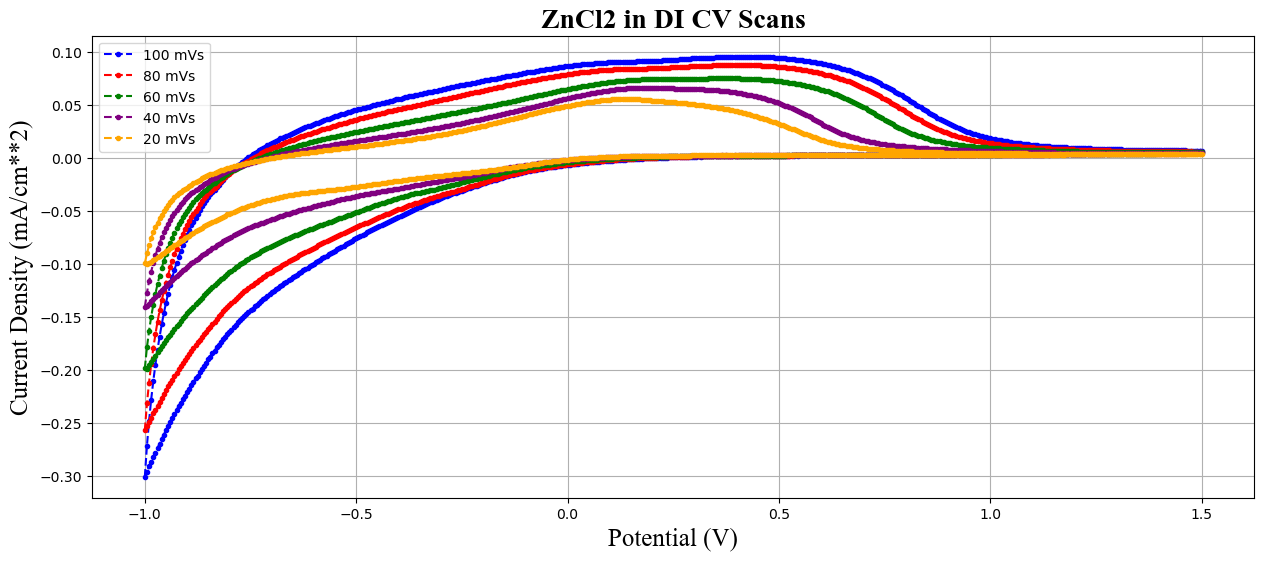

In [53]:
# Create a plot with multiple data sets
plt.figure(figsize=(15, 6))
plt.plot(x1, y1, label="100 mVs", color="blue", marker="o", markersize = 3, linestyle="--")
plt.plot(x2, y2, label="80 mVs", color="red", marker = "o", markersize = 3, linestyle="--")
plt.plot(x3, y3, label="60 mVs", color="green", marker="o", markersize = 3, linestyle="--")
plt.plot(x4, y4, label="40 mVs", color="purple", marker = "o",markersize = 3, linestyle="--")
plt.plot(x5, y5, label="20 mVs", color="orange", marker="o", markersize = 3, linestyle="--")


# Titles, labels, axis, legend
plt.title("ZnCl2 in DI CV Scans", fontsize=20, fontname="Times New Roman", fontweight="bold")
plt.xlabel("Potential (V)", fontsize=18, fontname="Times New Roman", fontweight="medium")
plt.ylabel("Current Density (mA/cm**2)", fontsize=18, fontname="Times New Roman", fontweight="medium")
plt.legend()
plt.grid(True)

plt.savefig("ZnCl4 in DI CV Scans.png")
plt.show()  


#make individual graphs for second and third cycle
#upload to Github, make repositry, create a release, link with Zinodo, will assign a DOI, 

# Anodic and Cathodic Reactions

In [31]:
import glob  # To read multiple files

files = [
    r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\100 mVs\Zinc-DW 221124 -1v 1.5v 100mvs Cycle2.xlsx",
    r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\80 mVs\Zinc-DW 221124 -1v 1.5v 80mvs Cycle2.xlsx",
    r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\60mVs\Zinc-DW 221124 -1v 1.5v 60mvs Cycle2.xlsx",
    r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\40 mVs\Zinc-DW 221124 -1v 1.5v 40mvs Cycle2.xlsx",
    r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\20mVs\Zinc-DW 221124 -1v 1.5v 20mvs Cycle2.xlsx"

]


# Lists to store highest and lowest Qdens values separately
highest_Qdens_list = []
lowest_Qdens_list = []

for file in files:
    df = pd.read_excel(file, sheet_name=0)  # Read from Sheet 1
    
    # Strip spaces from column names (Excel sometimes adds extra spaces)
    df.columns = df.columns.str.strip()
    
    # Find the highest and lowest Qdens values
    max_Qdens = df['Qdens'].max()
    min_Qdens = df['Qdens'].min()

     # Append to respective lists
    highest_Qdens_list.append(max_Qdens)
    lowest_Qdens_list.append(min_Qdens)

# Print results
print("Highest Qdens values:", highest_Qdens_list)
print("Lowest Qdens values:", lowest_Qdens_list)

Highest Qdens values: [0.09914388290527479, 0.09168737917702292, 0.07539353769676885, 0.06738470035901685, 0.05550952775476388]
Lowest Qdens values: [-0.3021264843965756, -0.25821596244131456, -0.19386909693454846, -0.13891190278928472, -0.0972107152720243]


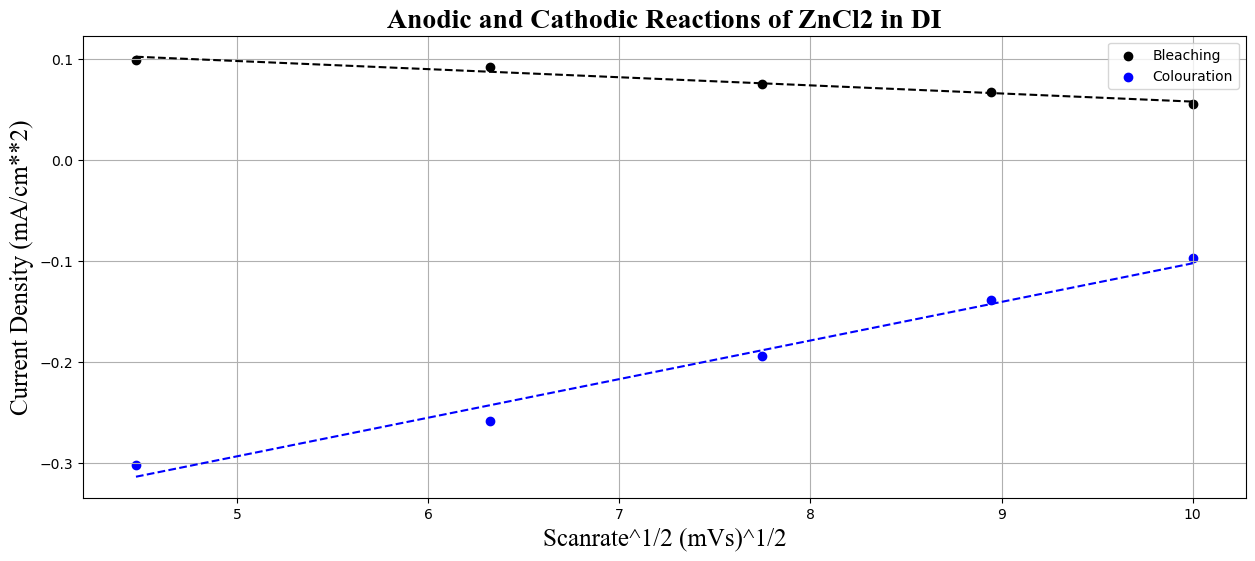

In [55]:
QdensvScanrate = r"C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\CV Scans\Zinc DI\-1 to 1.5 v\Qdens v Scanrate.xlsx"

dfBleach = pd.read_excel(QdensvScanrate, sheet_name="Bleaching")
dfColour = pd.read_excel(QdensvScanrate, sheet_name="Colouration")

# Extract the necessary columns
#Bleach
x1B = dfBleach['Scanrate']
y1B = dfBleach['Qdens']

#Colour
x1C = dfColour['Scanrate']
y1C = dfColour['Qdens']

# Create a plot with multiple data sets
plt.figure(figsize=(15, 6))
plt.scatter(x1B, y1B, label="Bleaching", color="black", marker="o")
plt.scatter(x1C, y1C, label="Colouration", color="blue", marker = "o")

# Fit a line of best fit (1st-degree polynomial = linear regression)
#Bleached
mB, bB = np.polyfit(x1B, y1B, 1)  # m = slope, b = intercept
best_fit_line_Bleached = np.poly1d((mB, bB))  # Create the function

#Colouartion
mC, bC = np.polyfit(x1C, y1C, 1)  # m = slope, b = intercept
best_fit_line_Colour = np.poly1d((mC, bC))  # Create the function

# Generate x-values for the line
#Bleached
x_fit_B = np.linspace(min(x1B), max(x1B), 100)  # More points for a smooth line
y_fit_B = best_fit_line_Bleached(x_fit_B)  # Compute y-values for best-fit line

#Colouration
x_fit_C = np.linspace(min(x1C), max(x1C), 100)  # More points for a smooth line
y_fit_C = best_fit_line_Colour(x_fit_C)  # Compute y-values for best-fit line

# Plot the line of best fit
plt.plot(x_fit_B, y_fit_B, color='black', linestyle='--')
plt.plot(x_fit_C, y_fit_C, color='blue', linestyle='--')

# Titles, labels, axis, legend
plt.title("Anodic and Cathodic Reactions of ZnCl2 in DI", fontsize=20, fontname="Times New Roman", fontweight="bold")
plt.xlabel("Scanrate^1/2 (mVs)^1/2", fontsize=18, fontname="Times New Roman", fontweight="medium")
plt.ylabel("Current Density (mA/cm**2)", fontsize=18, fontname="Times New Roman", fontweight="medium")
plt.legend()
plt.grid(True)

plt.savefig("ZnCl2 in DI Anodic and Cathodic Reactions.png")
plt.show()

# Working out diffusion coefficient

$D^{1/2}=\frac{i_{p}}{2.69*10^{5}*n^{3/2}*A*C_{0}*v^{1/2}}$

But the graph already includes divsion by area and scan rate, therefore:

$D^{1/2}=\frac{m}{2.69*10^{5}*n^{3/2}*C_{0}}$

Where n = 1 and m is the gradient of the anodic or cathodic slopes

In [37]:
#Confirm gradients to be used in diffusion coefficient calculation
print('Bleached gradient is',mB)
print('Colured gradient is',mC)

Bleached gradient is -0.008039184171353915
Colured gradient is 0.0382343701722069


In [39]:
#Create a function to calculate the diffusion coefficient
#Assume n=1 (number of electrons transferred in reaction)
#C0 is the bulk concentration of electrolytes in Moles


def Diffusion_Coefficient(ip,C0):
    numerator = ip
    denomenator = 2.69E5*C0
    diffusion_coefficient = (numerator/denomenator)**2
    return(diffusion_coefficient)

In [41]:
Diffusion_Coefficient(mB,0.1) #For bleached with 0.1M (Zinc)

8.931397042736742e-14

In [43]:
Diffusion_Coefficient(mC,0.1) #For Coloured with 0.1M (Zinc)

2.0202416529143383e-12